Import Libraies

In [1]:
import pypyodbc as odbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Connect to SQL Server

In [12]:
DRIVER_NAME = 'ODBC Driver 17 for SQL Server'
SERVER_NAME = r'DESKTOP-L3GBMQ5\SQLEXPRESS'
DATABASE_NAME = 'Case_Studies'

connection_string = (
    f"DRIVER={{{DRIVER_NAME}}};"
    f"SERVER={SERVER_NAME};"
    f"DATABASE={DATABASE_NAME};"
    f"Trusted_Connection=yes;"
)

conn = odbc.connect(connection_string)
print("Connected successfully!")

Connected successfully!


Sales Aggregation

In [17]:
query_sales = """
SELECT
    Product_Category
    ,Product_Name
    ,SUM(Quantity) AS Total_Quantity
    ,SUM(Total_Sales) AS Total_Sales
    ,AVG(DATEDIFF(MINUTE, '00:00:00', Discount)) AS Average_Discount
FROM 
    dbo.retail_sales_cleaned
GROUP BY
    Product_Category
    ,Product_Name
ORDER BY
    Total_Sales DESC
"""

df_sales = pd.read_sql(query_sales, conn)
df_sales.head(25)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_1644\3795611977.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales = pd.read_sql(query_sales, conn)


,product_category,product_name,total_quantity,total_sales,average_discount
0,Electronics,Laptop,140,143728.995621,14
1,Electronics,Sofa,154,128363.960724,14
2,Electronics,Rice Bag,115,109615.405731,16
3,Electronics,Headphones,133,102849.588943,13
4,Furnitre,Laptop,103,99778.860291,14
5,Electronics,T-Shirt,141,94158.182190,13
6,Groceries,Laptop,103,91107.949158,16
7,Electronics,Table,87,82379.505493,18
8,Groceries,Headphones,91,79061.345642,13
9,Groceries,Table,74,73137.390686,16


Top 10 and Bottom 10 Products by Sales

In [ ]:
# Top 10
top_10_products = df_sales.nlargest(10, 'total_sales')
print("Top 10 Products by Sales:")
top_10_products

Top 10 Products by Sales:


,product_category,product_name,total_quantity,total_sales,average_discount
0,Electronics,Laptop,140,143728.995621,14
1,Electronics,Sofa,154,128363.960724,14
2,Electronics,Rice Bag,115,109615.405731,16
3,Electronics,Headphones,133,102849.588943,13
4,Furnitre,Laptop,103,99778.860291,14
5,Electronics,T-Shirt,141,94158.182190,13
6,Groceries,Laptop,103,91107.949158,16
7,Electronics,Table,87,82379.505493,18
8,Groceries,Headphones,91,79061.345642,13
9,Groceries,Table,74,73137.390686,16


In [21]:
# Bottom 10
bottom_10_products = df_sales.nsmallest(10, 'total_sales')
print("Bottom 10 Products by Sales:")
bottom_10_products

Bottom 10 Products by Sales:


,product_category,product_name,total_quantity,total_sales,average_discount
35,Other,Headphones,15,6351.358429,11
34,Other,Table,7,8649.362305,16
33,Other,T-Shirt,26,18390.159424,15
32,Other,Rice Bag,25,20458.365021,20
31,Other,Laptop,27,21732.271240,18
30,Furniture,Table,25,26455.498779,15
29,Other,Sofa,38,35063.274414,14
28,Clothing,Headphones,52,44373.209969,13
27,Groceries,Rice Bag,48,44632.718140,14
26,Clothing,Rice Bag,66,50195.498886,14


Category Contribution to Total Sales

In [22]:
# Total Sales Overall

total_sales = df_sales['total_sales'].sum()

In [23]:
# Group by category and calculate contribution
category_sales = df_sales.groupby('product_category')['total_sales'].sum().reset_index()
category_sales['contribution_pct'] = (category_sales['total_sales'] / total_sales) * 100

In [24]:
# Sort descending
category_sales = category_sales.sort_values(by='total_sales', ascending=False)
category_sales

,product_category,total_sales,contribution_pct
1,Electronics,661095.638702,29.311189
4,Groceries,407040.322290,18.047065
2,Furnitre,394930.575012,17.510151
3,Furniture,351547.726418,15.586673
0,Clothing,330178.758324,14.639231
5,Other,110644.790833,4.905690


Pareto Analsis (80/20)

In [25]:
# Sort product by total_sales
df_sales_sorted = df_sales.sort_values(by='total_sales', ascending=False)
df_sales_sorted['cumulative_sales'] = df_sales_sorted['total_sales'].cumsum()
df_sales_sorted['cumulative_pct'] = 100 * df_sales_sorted['cumulative_sales'] / total_sales

In [26]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

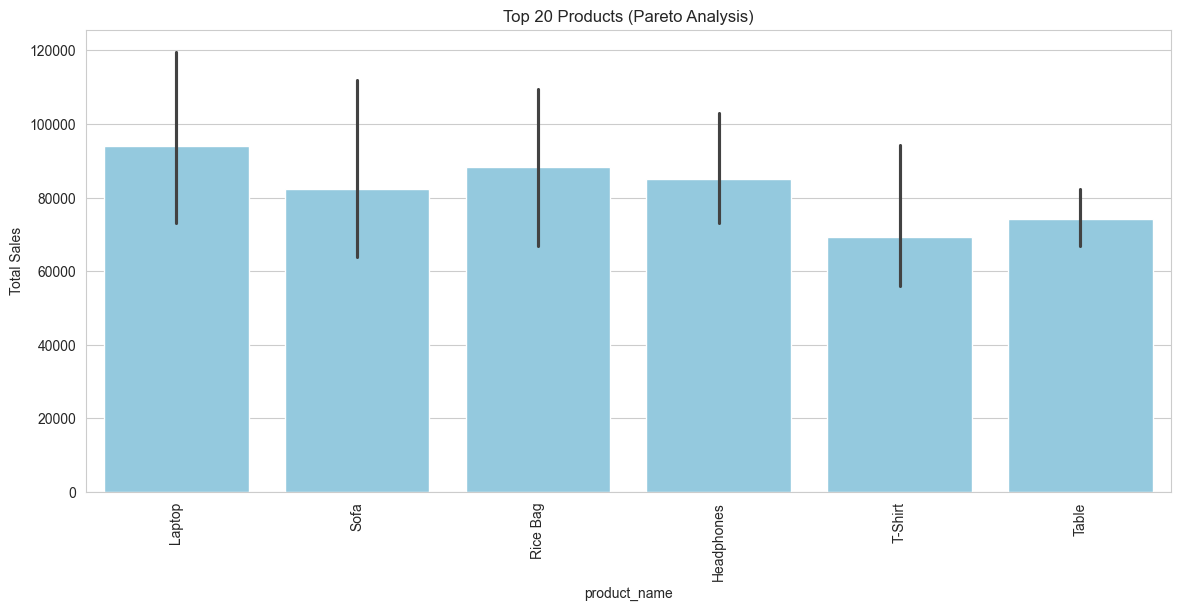

In [29]:
plt.figure(figsize=(14,6))
sns.barplot(x='product_name', y='total_sales', data=df_sales_sorted.head(20), color='skyblue')
plt.xticks(rotation=90)
plt.title("Top 20 Products (Pareto Analysis)")
plt.ylabel("Total Sales")
plt.show()

Monthly Sales Trend

In [30]:
query_monthly = """
SELECT
    Order_year
    ,Order_month
    ,SUM(Total_Sales) AS Monthly_Sales
FROM
    dbo.retail_sales_cleaned
GROUP BY
    Order_year
    ,Order_month
ORDER BY
    Order_year
    ,Order_month
"""
df_monthly = pd.read_sql(query_monthly, conn)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_1644\871881723.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_monthly = pd.read_sql(query_monthly, conn)


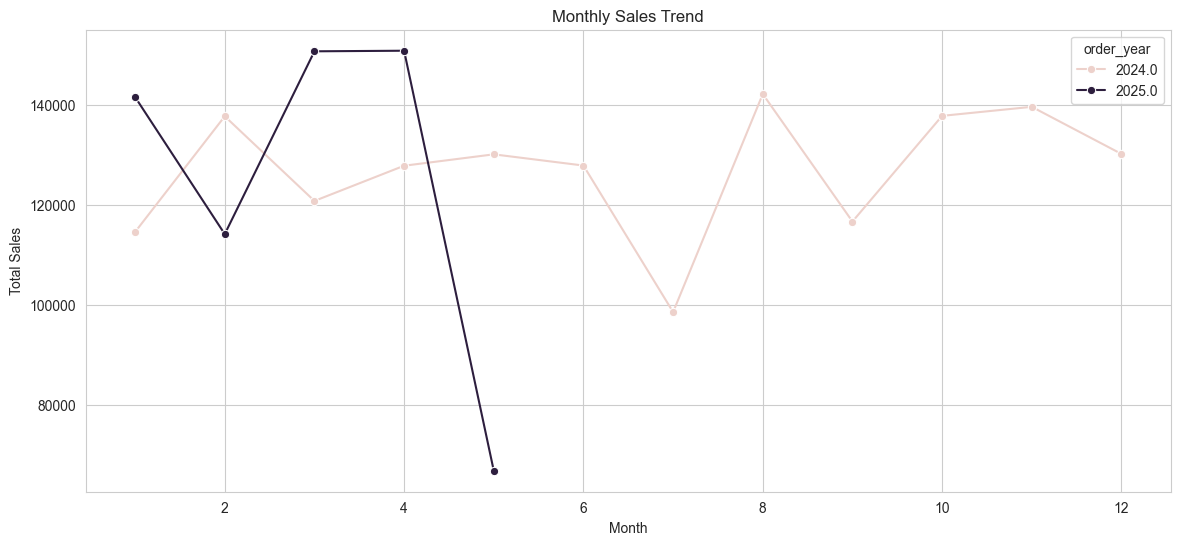

In [32]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_monthly, x='order_month', y='monthly_sales', hue='order_year', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

Discount vs Sales Correlation

In [33]:
# Check correlation
corr = df_sales['average_discount'].corr(df_sales['total_sales'])
print(f"Correlation between Average Discount and Total Sales: {corr:.2f}")

Correlation between Average Discount and Total Sales: -0.10


Extra Insights

In [34]:
# Calculate return rate per product
query_returns = """
SELECT
    Product_Name
    ,COUNT(*) AS Total_Orders
    ,SUM(CASE WHEN Delivery_Status = 'Returned' THEN 1 ELSE 0 END) AS Total_Returns
FROM
    dbo.retail_sales_cleaned
GROUP BY
    Product_Name
"""

In [35]:
df_returns = pd.read_sql(query_returns, conn)
df_returns['return_rate'] = (df_returns['total_returns'] / df_returns['total_orders']) * 100

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_1644\761374040.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_returns = pd.read_sql(query_returns, conn)


In [36]:
# Merge with sales data
df_sales_returns = df_sales.merge(df_returns[['product_name', 'return_rate']], on='product_name', how='left')

In [37]:
# Products with high sales & high returns
high_sales_returns = df_sales_returns[(df_sales_returns['total_sales'] > df_sales_returns['total_sales'].mean())
                                      & (df_sales_returns['return_rate'] > 10)]

In [38]:
high_sales_returns

,product_category,product_name,total_quantity,total_sales,average_discount,return_rate
0,Electronics,Laptop,140,143728.995621,14,30.693069
1,Electronics,Sofa,154,128363.960724,14,20.481928
2,Electronics,Rice Bag,115,109615.405731,16,26.388889
3,Electronics,Headphones,133,102849.588943,13,27.710843
4,Furnitre,Laptop,103,99778.860291,14,30.693069
5,Electronics,T-Shirt,141,94158.182190,13,25.882353
6,Groceries,Laptop,103,91107.949158,16,30.693069
7,Electronics,Table,87,82379.505493,18,28.070175
8,Groceries,Headphones,91,79061.345642,13,27.710843
9,Groceries,Table,74,73137.390686,16,28.070175
